# Black holes in a bathroom

This notebook contains some examples of signal processing with sounds.
<br>
<br>
Date Created: 18 Sep 2022
<br>
Last Modified: 4 Aug 2025

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

from IPython.display import Image, Audio

font_size = 25
plt.rcParams.update({'font.size': font_size})

# 1.0 Reading in .wav files

In [2]:
fs, signal_violin = wavfile.read("data_bhb/violin_fs=16kHz.wav")

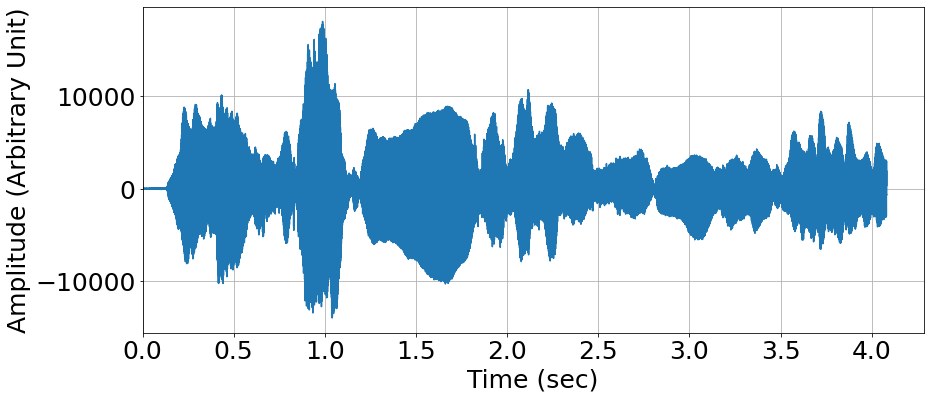

In [3]:
signal_violin = signal_violin.astype(np.float64)
t = np.arange(0, len(signal_violin)) * (1/fs)

plt.figure(figsize=(14,6))
plt.plot(t, signal_violin)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (Arbitrary Unit)')
plt.xlim(0)
plt.grid()
plt.show()

In [5]:
Audio(signal_violin, rate=fs)

# 2.0 Impulse Response
Data from:
<br>
https://www.iks.rwth-aachen.de/en/research/tools-downloads/databases/aachen-impulse-response-database/

## Bathroom

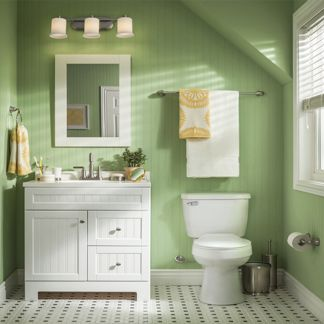

In [6]:
Image(filename='data_bhb/bathroom.jpeg', width=400)

# Image source: https://lda.lowes.com/is/image/Lowes/content-panel-desktop?src=Lowes/DP18-38994_Bathroom_dt_cp_BathroomPaint

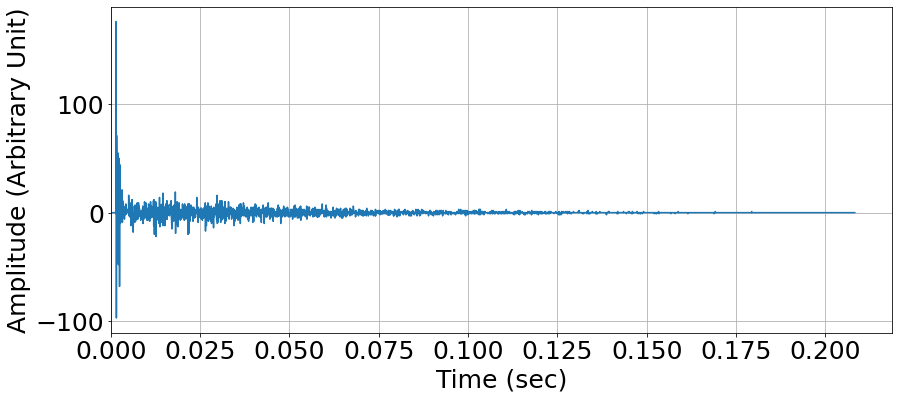

In [7]:
fs, IR_bathroom = wavfile.read("data_bhb/IR_bathroom_fs=16kHz.wav")
IR_bathroom = IR_bathroom.astype(np.float64)
t = np.arange(0, len(IR_bathroom)) * (1/fs)

plt.figure(figsize=(14,6))
plt.plot(t, IR_bathroom)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (Arbitrary Unit)')
plt.xlim(0)
plt.grid()
plt.show()

In [8]:
Audio(IR_bathroom, rate=fs)

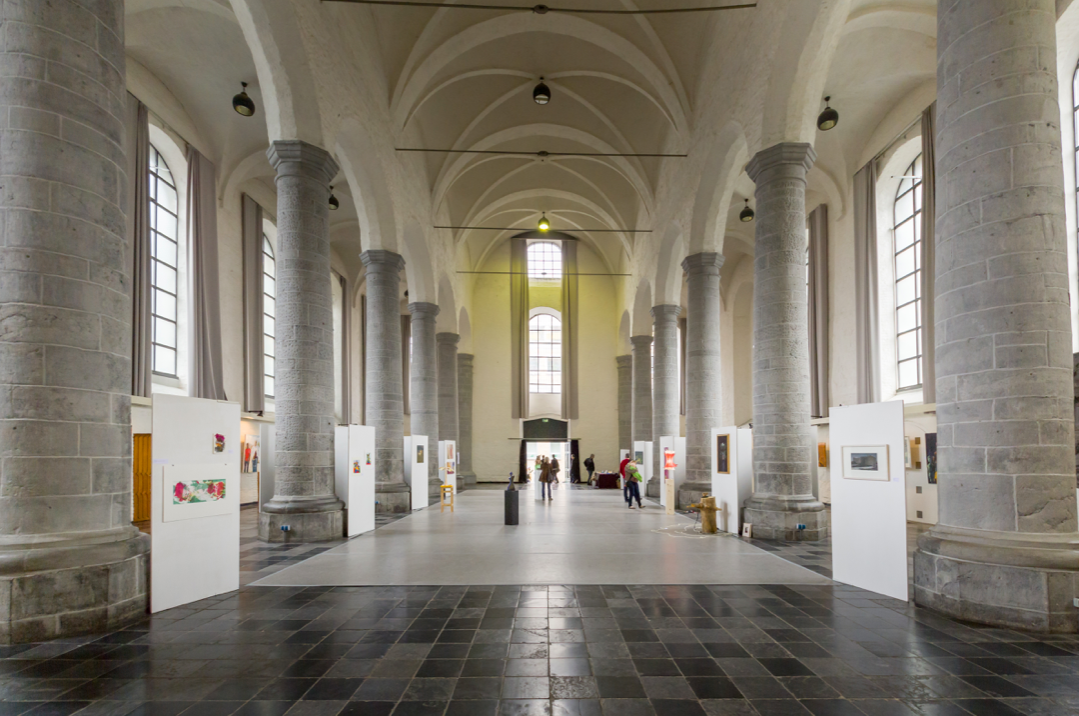

In [9]:
# The Aula Carolina hall in Aachen, Germany
Image(filename='data_bhb/Aula_Carolina.png', width=800) 

# Image source: https://de.wikipedia.org/wiki/Aula_Carolina#/media/File:Aula_Carolina.jpg

In [10]:
fs, IR_AC = wavfile.read("data_bhb/IR_ac_fs=16kHz.wav")

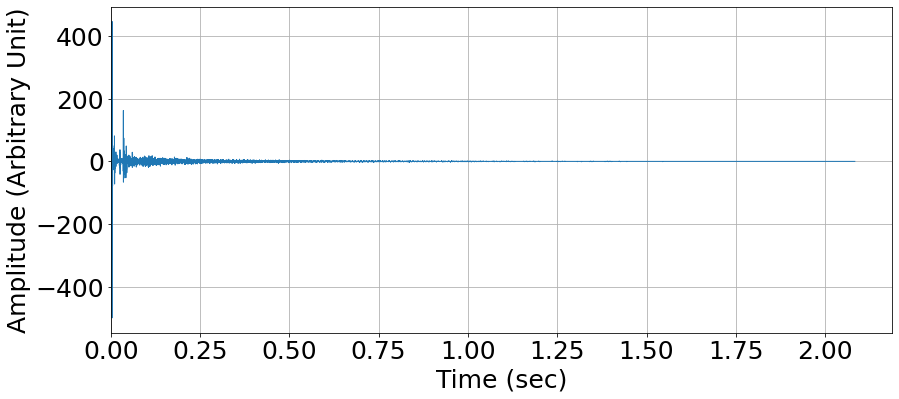

In [11]:
t = np.arange(0, len(IR_AC)) * (1/fs)

plt.figure(figsize=(14,6))
plt.plot(t, IR_AC, lw=1)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (Arbitrary Unit)')
plt.xlim(0)
plt.grid()
plt.show()

In [12]:
Audio(IR_AC, rate=fs)

# Violin

In [13]:
signal_violin_bathroom = np.convolve(signal_violin, IR_bathroom, 'full')

In [14]:
signal_violin_AC = np.convolve(signal_violin, IR_AC, 'full')

In [15]:
Audio(signal_violin, rate=fs)

In [16]:
Audio(signal_violin_bathroom, rate=fs)

In [17]:
Audio(signal_violin_AC, rate=fs)

# Speech

In [18]:
fs, data = wavfile.read("data_bhb/airvib16.wav")
signal_speech = data.astype(np.float64)

signal_speech_bathroom = np.convolve(signal_speech, IR_bathroom, 'full')
signal_speech_AC = np.convolve(signal_speech, IR_AC, 'full')

In [19]:
Audio(signal_speech, rate=fs)

In [20]:
Audio(signal_speech_bathroom, rate=fs)

In [21]:
Audio(signal_speech_AC, rate=fs)

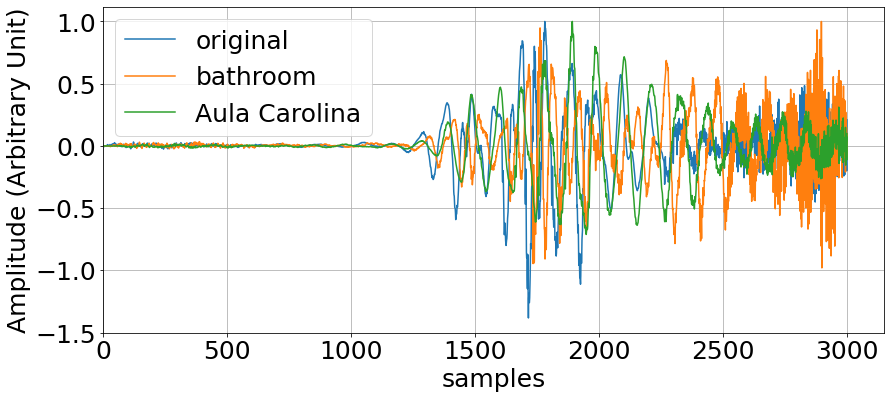

In [22]:
N = 3000
plt.figure(figsize=(14,6))
plt.plot(signal_speech[0:N]/np.max(signal_speech[0:N]), label='original')
plt.plot(signal_speech_bathroom[0:N]/np.max(signal_speech_bathroom[0:N]), label='bathroom')
plt.plot(signal_speech_AC[0:N]/np.max(signal_speech_AC[0:N]), label='Aula Carolina')
plt.legend()
plt.xlabel('samples')
plt.ylabel('Amplitude (Arbitrary Unit)')
plt.xlim(0)
plt.grid()
plt.show()

# Black holes! (merging)

In [23]:
fs, data = wavfile.read("data_bhb/o1o2_modelstrain30hz_stereo_hleft_lright.wav")

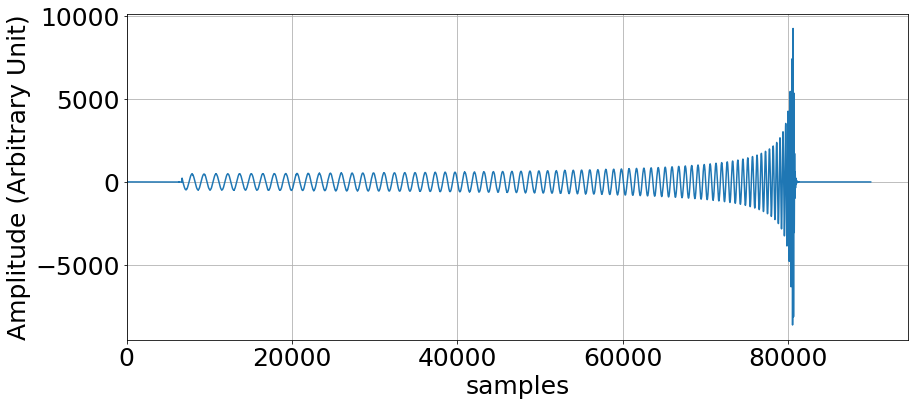

In [24]:
# signal_BH = data[307026:390026].astype(np.float64)

signal_BH = data[300026:390026].astype(np.float64)

plt.figure(figsize=(14,6))
plt.plot(signal_BH)
plt.xlabel('samples')
plt.ylabel('Amplitude (Arbitrary Unit)')
plt.xlim(0)
plt.grid()
plt.show()

In [25]:
signal_BH_bathroom = np.convolve(signal_BH, IR_bathroom, 'full')

In [26]:
signal_BH_AC = np.convolve(signal_BH, IR_AC, 'full')

In [27]:
Audio(signal_BH, rate=fs)

In [28]:
Audio(signal_BH_bathroom, rate=fs)

In [29]:
Audio(signal_BH_AC, rate=fs)